## EDA AND PREPROCESSING-ASSIGNMENT

# IMPORT ALL NECESSARY LIBRARIES

In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data into Pandas dataframe

In [5]:
#Reading the data before preprocessing
df_employee = pd.read_csv("Employee.csv.csv")
df_employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
#reading the first 5 rows
df_employee.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [9]:
#reading the last 5 rows
df_employee.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


# STEPS IN EDA AND PREPROCESSING:
1.Acquire the dataset 2.Importing the libraries 3.Importing the dataset 4.Finding the Missing data 5.Finding and handling outliers 6.Encoding the categorical data 7.Featuring selection 8.Splitting the dataset 9.Feature scaling.

# Understanding the Data

In [11]:
#Understanding the Data:
df_employee.describe()

#statistical summary of the data set which gives the count, mean, standard deviation, minimum,
#and quartiles for each numerical column. The dataset’s central tendencies and spread are briefly summarized.

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [13]:
#facilitates comprehension of the data type and related information, such as the quantity of records in each column,
#whether the data is null or not, the type of data, and the dataset’s memory usage.

df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [15]:
#shape will show how many features and observations there are in the dataset.
df_employee.shape

(148, 6)

# Dataset Overview
14879 rows (entries6
16 columns (features)
Mi (4) data t includes float(2),integer(1),object(3)ypes

# Finding the Missing values

In [17]:
df_employee.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

# 1.Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns

In [19]:
#Display the names of the columns
df_employee.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [21]:
df_employee['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [23]:
df_employee['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [25]:
#1.list down the unique values in each feature and find its length.

for column in df_employee.columns:
    unique_values = df_employee[column].unique()
    unique_length = len(unique_values)
    print(f"{column}: {unique_values}, Length: {unique_length}")


Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'], Length: 7
Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.], Length: 30
Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.], Length: 41
Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'], Length: 12
Country: ['India'], Length: 1
Gender: [0 1], Length: 2


In [27]:
# 2. Perform statistical analysis

stats = df_employee.describe(include='all')  # include='all' gives stats for numerical and categorical data
print(stats)

       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [29]:
# 3. Renaming the columns 
df_employee.rename(columns={
    'Company': 'Employers_Name',          
    'Age': 'Employee_Age',
    'Salary': 'Employee_Salary',
    'Place': 'Company_Place',
    'Country':'Country_of_company',
    'Gender':'Employee_Gender'
}, inplace=True)


In [31]:
df_employee

,Employers_Name,Employee_Age,Employee_Salary,Company_Place,Country_of_company,Employee_Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# 2.Find the missing and inappropriate values, treat them appropriatel
yRemove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode).


In [33]:
#Finding the missing values
df_employee.isnull().sum()

Employers_Name         8
Employee_Age          18
Employee_Salary       24
Company_Place         14
Country_of_company     0
Employee_Gender        0
dtype: int64

There are 8 missing values in Employers_name,18 inEmployee_Age,24 in Employee_Salary,and 14 in Company_Place.

In [35]:
#handling the missing values appropriately.
#Replacing the value 0 in age as NaN
df_employee['Employee_Age'] = df_employee['Employee_Age'].replace(0, np.nan)
df_employee['Employee_Age'] 

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
143    33.0
144    22.0
145    44.0
146    33.0
147    22.0
Name: Employee_Age, Length: 148, dtype: float64

In [37]:
#checking duplicates
df_employee.duplicated().sum() 

4

In [39]:
df_employee.shape

(148, 6)

Handling Duplicates

In [41]:
#Removing duplicates
df_employee.drop_duplicates(inplace=True)

In [43]:
df_employee.shape

(144, 6)

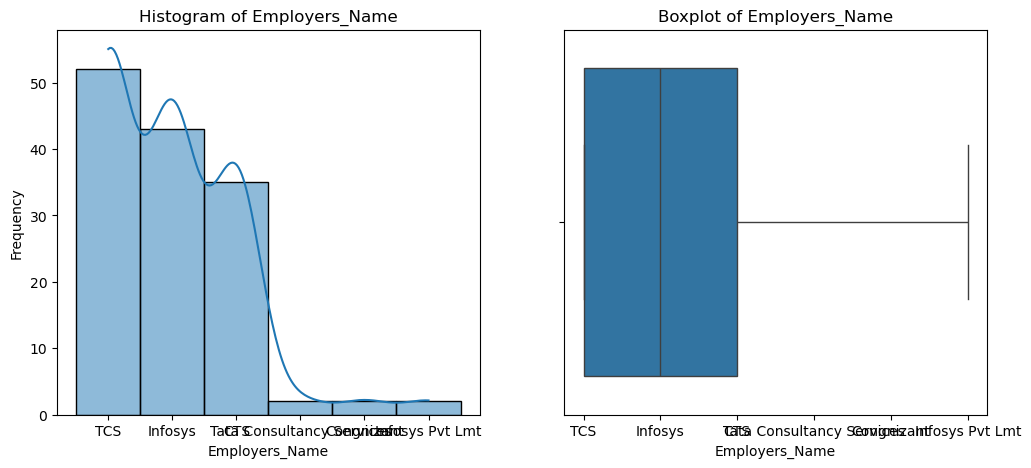

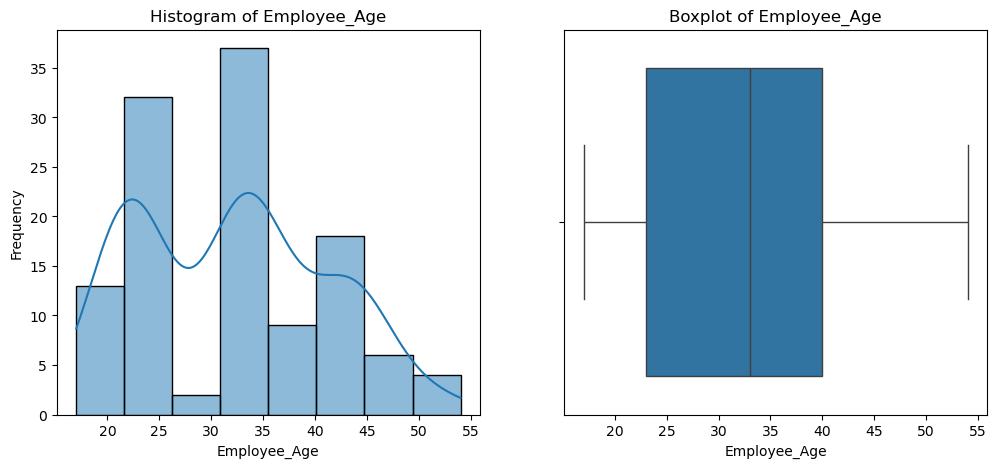

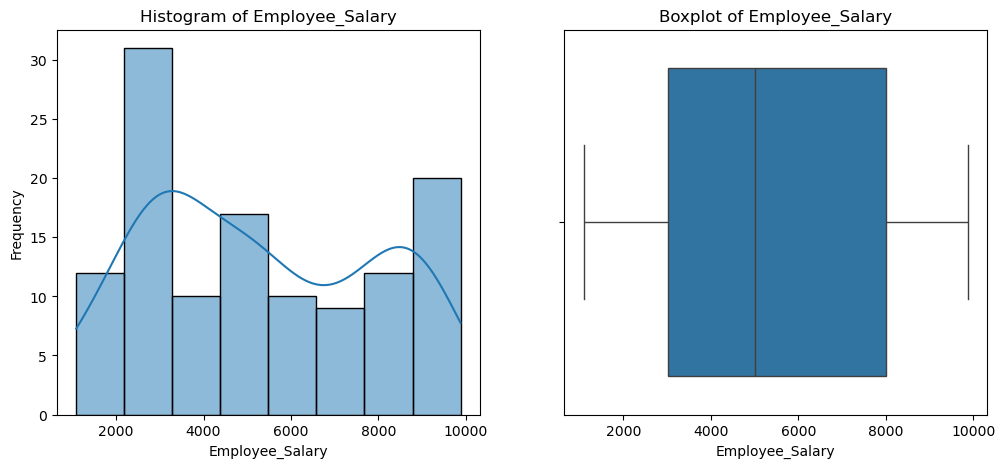

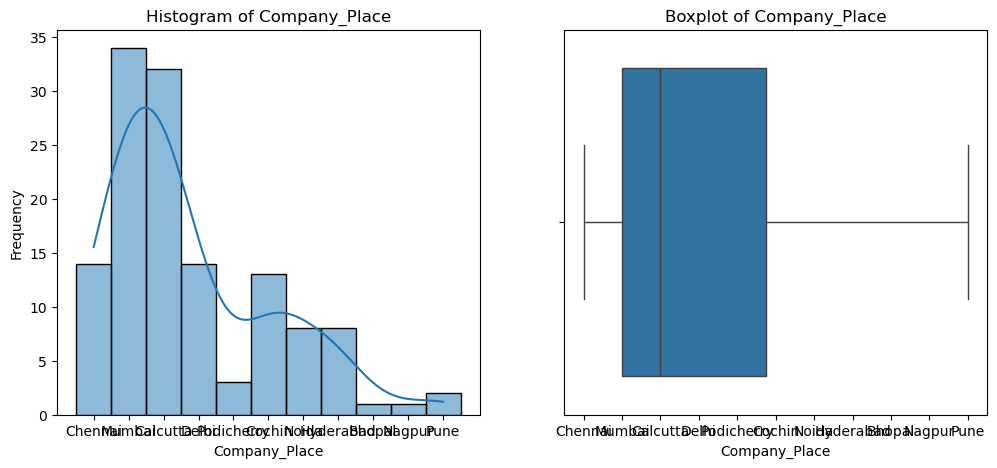

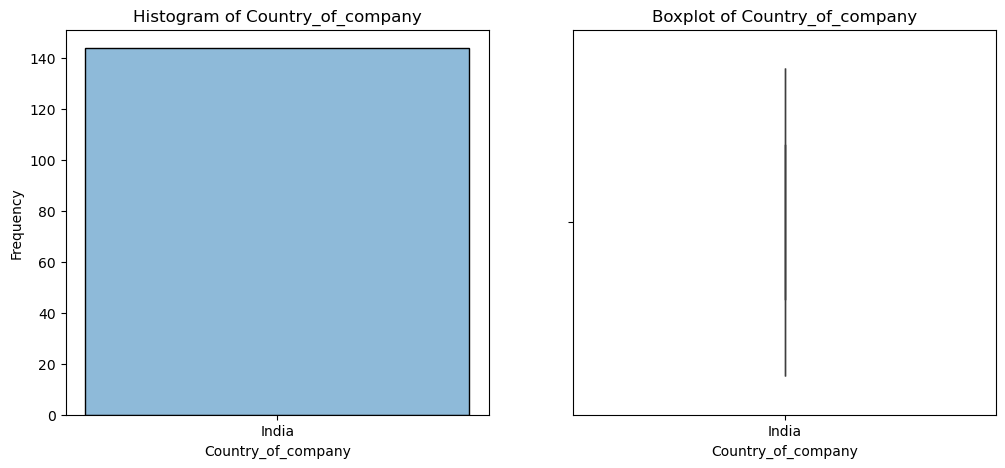

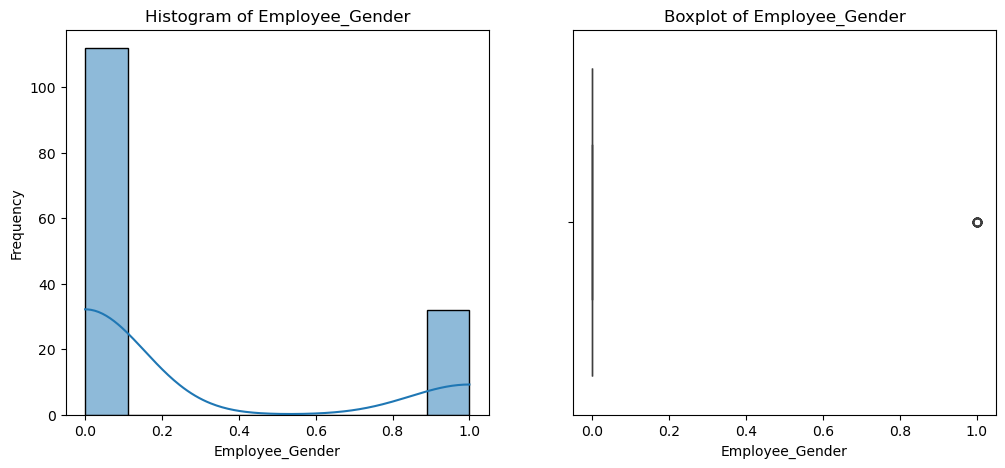

In [45]:
for i in df_employee.columns:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_employee[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_employee[i])
    plt.title(f'Boxplot of {i}')

    plt.show()

Checking the skewness of the data

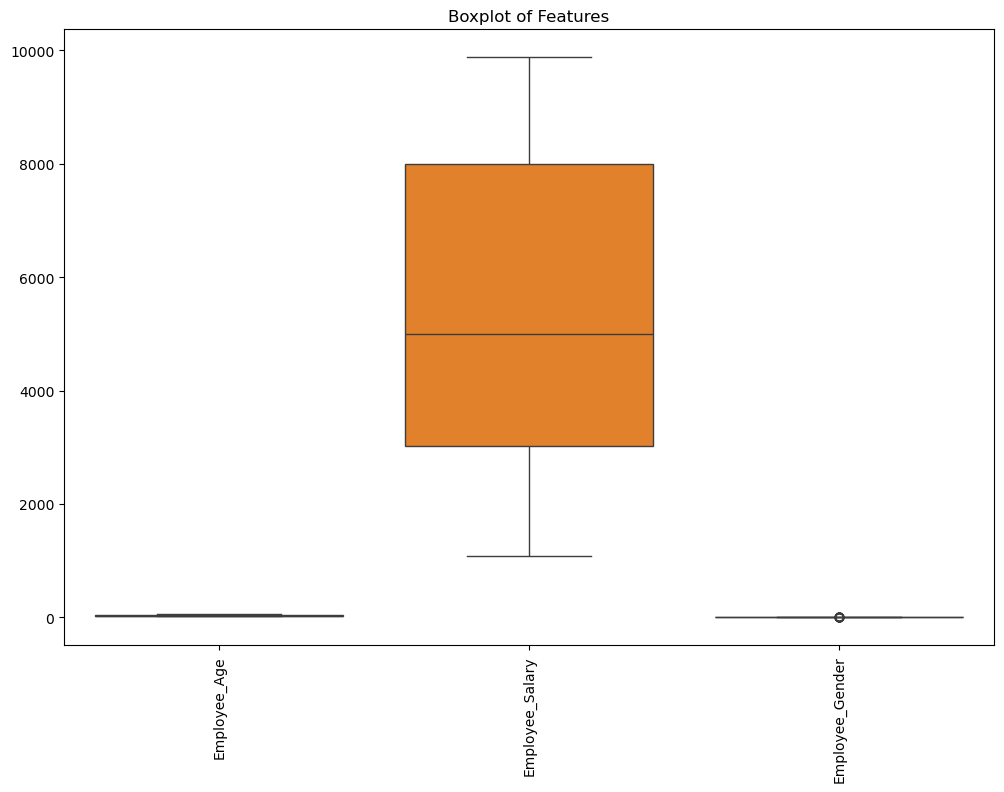

In [47]:
#Check skewness of the data
#Display boxplot of each column
plt.figure(figsize=(12,8))
sns.boxplot(df_employee)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

There are outliers in Employee_Age and Employee_Gender.

Finding and removing the outliers

In [49]:
#finding outliers

def remove_outliers(df_employee,columns):
  data_filtered=df_employee.copy()

  for column in columns:
     Q1 = df_employee[column].quantile(0.25)
     Q3 = df_employee[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered

In [51]:
new_data=remove_outliers(df_employee,['Employee_Age','Employee_Gender'])
new_data

,Employers_Name,Employee_Age,Employee_Salary,Company_Place,Country_of_company,Employee_Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Congnizant,22.0,2934.0,Noida,India,0
140,Infosys,44.0,4034.0,Hyderabad,India,0
141,TCS,33.0,5034.0,Calcutta,India,0
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0


After removing outliers using IQR there are only 94 rows and 6 columns in the new_data.

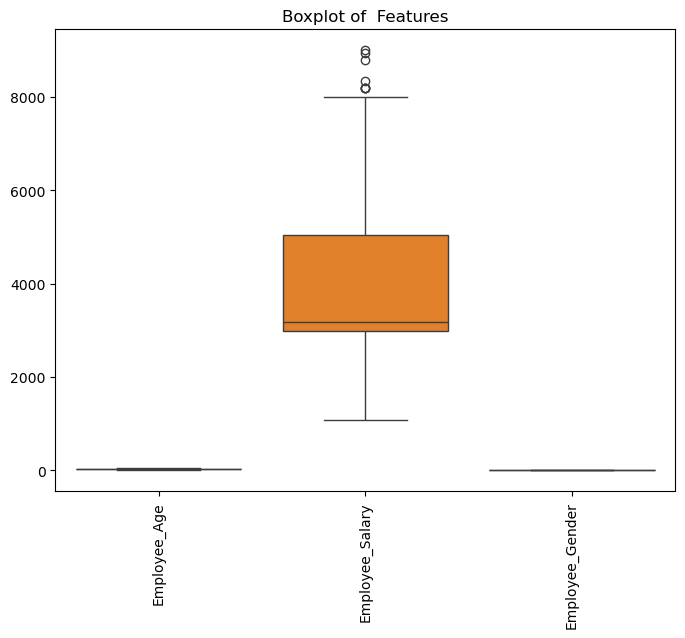

In [53]:
# Visualization of outliers after removing outliers of different features using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(new_data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [55]:
# Differentiating Columns
categorical_columns = df_employee.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df_employee.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['Employers_Name', 'Company_Place', 'Country_of_company']
Numerical Columns: ['Employee_Age', 'Employee_Salary', 'Employee_Gender']


In [57]:
#Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)
# For categorical data, we can use mode
# Mode Imputation 
df_employee['Employers_Name'] = df_employee['Employers_Name'].fillna(df_employee['Employers_Name'].mode()[0])
df_employee

,Employers_Name,Employee_Age,Employee_Salary,Company_Place,Country_of_company,Employee_Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [59]:
df_employee['Company_Place'] = df_employee['Company_Place'].fillna(df_employee['Company_Place'].mode()[0])
print(df_employee)


      Employers_Name  Employee_Age  Employee_Salary Company_Place  \
0                TCS          20.0              NaN       Chennai   
1            Infosys          30.0              NaN        Mumbai   
2                TCS          35.0           2300.0      Calcutta   
3            Infosys          40.0           3000.0         Delhi   
4                TCS          23.0           4000.0        Mumbai   
..               ...           ...              ...           ...   
142  Infosys Pvt Lmt          22.0           8202.0        Mumbai   
143              TCS          33.0           9024.0      Calcutta   
145          Infosys          44.0           4034.0         Delhi   
146              TCS          33.0           5034.0        Mumbai   
147          Infosys          22.0           8202.0        Cochin   

    Country_of_company  Employee_Gender  
0                India                0  
1                India                0  
2                India                0  
3  

In [61]:
#For numerical data use median
df_employee['Employee_Age'] = df_employee['Employee_Age'].fillna(df_employee['Employee_Age'].median())
print(df_employee)

      Employers_Name  Employee_Age  Employee_Salary Company_Place  \
0                TCS          20.0              NaN       Chennai   
1            Infosys          30.0              NaN        Mumbai   
2                TCS          35.0           2300.0      Calcutta   
3            Infosys          40.0           3000.0         Delhi   
4                TCS          23.0           4000.0        Mumbai   
..               ...           ...              ...           ...   
142  Infosys Pvt Lmt          22.0           8202.0        Mumbai   
143              TCS          33.0           9024.0      Calcutta   
145          Infosys          44.0           4034.0         Delhi   
146              TCS          33.0           5034.0        Mumbai   
147          Infosys          22.0           8202.0        Cochin   

    Country_of_company  Employee_Gender  
0                India                0  
1                India                0  
2                India                0  
3  

In [63]:
df_employee['Employee_Salary'] = df_employee['Employee_Salary'].fillna(df_employee['Employee_Salary'].median())
print(df_employee)

      Employers_Name  Employee_Age  Employee_Salary Company_Place  \
0                TCS          20.0           5000.0       Chennai   
1            Infosys          30.0           5000.0        Mumbai   
2                TCS          35.0           2300.0      Calcutta   
3            Infosys          40.0           3000.0         Delhi   
4                TCS          23.0           4000.0        Mumbai   
..               ...           ...              ...           ...   
142  Infosys Pvt Lmt          22.0           8202.0        Mumbai   
143              TCS          33.0           9024.0      Calcutta   
145          Infosys          44.0           4034.0         Delhi   
146              TCS          33.0           5034.0        Mumbai   
147          Infosys          22.0           8202.0        Cochin   

    Country_of_company  Employee_Gender  
0                India                0  
1                India                0  
2                India                0  
3  

In [65]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employers_Name      144 non-null    object 
 1   Employee_Age        144 non-null    float64
 2   Employee_Salary     144 non-null    float64
 3   Company_Place       144 non-null    object 
 4   Country_of_company  144 non-null    object 
 5   Employee_Gender     144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


# Data Analysis: 
Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually



In [67]:
# 1. Filter the data with age > 40 and salary < 5000
filtered_data = df_employee[(df_employee['Employee_Age'] > 40) & (df_employee['Employee_Salary'] < 5000)]
print("\nFiltered Data (Employee_Age > 40 and Employee_Salary < 5000):")
print(filtered_data)


Filtered Data (Employee_Age > 40 and Employee_Salary < 5000):
    Employers_Name  Employee_Age  Employee_Salary Company_Place  \
21         Infosys          50.0           3184.0         Delhi   
32         Infosys          45.0           4034.0      Calcutta   
39         Infosys          41.0           3000.0        Mumbai   
50         Infosys          41.0           3000.0       Chennai   
57         Infosys          51.0           3184.0     Hyderabad   
68         Infosys          43.0           4034.0        Mumbai   
75         Infosys          44.0           3000.0        Cochin   
86         Infosys          41.0           3000.0         Delhi   
93         Infosys          54.0           3184.0        Mumbai   
104        Infosys          44.0           4034.0         Delhi   
122        Infosys          44.0           3234.0        Mumbai   
129        Infosys          50.0           3184.0      Calcutta   
138            CTS          44.0           3033.0        Cochin   

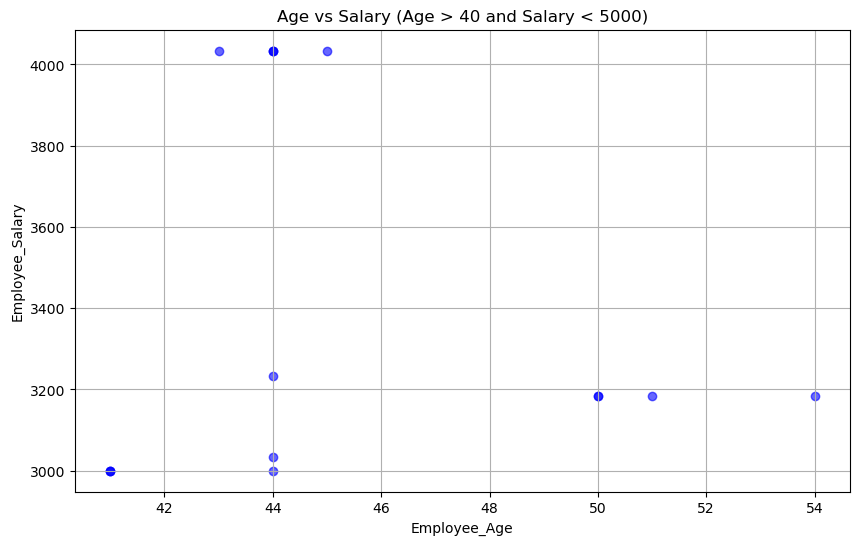

In [69]:
# 2. Plot the chart with age and salary
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Employee_Age'], filtered_data['Employee_Salary'], color='blue', alpha=0.6)
plt.title('Age vs Salary (Age > 40 and Salary < 5000)')
plt.xlabel('Employee_Age')
plt.ylabel('Employee_Salary')
plt.grid()
plt.show()

Large no.of employees are having the age 43, 44, 45 and among them few are getting the highest salary.There is no relation between age and salary.

In [71]:
# 3. Count the number of people from each place
place_counts = df_employee['Company_Place'].value_counts()
print("\nCount of people from each place:")
print(place_counts)


Count of people from each place:
Company_Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


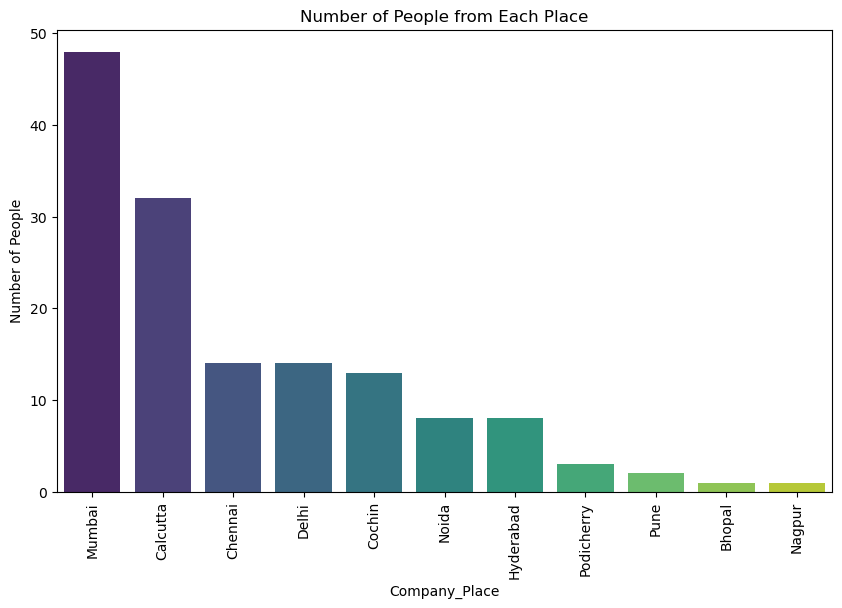

In [73]:
# 4. Represent the counts visually
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts.values, palette='viridis')
plt.title('Number of People from Each Place')
plt.xlabel('Company_Place')
plt.ylabel('Number of People')
plt.xticks(rotation=90)  
plt.show()

# Analysis of the visualization:
Most of the employees are from Mumbai and the lowest number of employees are from Nagpur.Metropolitan Cities like Mumbai and Calcutta are having the largest no.of employees.

# Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.



In [75]:
#Creating a copy of data
data1=df_employee.copy()
data1

,Employers_Name,Employee_Age,Employee_Salary,Company_Place,Country_of_company,Employee_Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [77]:
# 1. Label Encoding for ordinal categorical variables
# This is appropriate for ordinal data, if 'Employers_Name' has a natural order.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data1['Employers_Name'] = label_encoder.fit_transform(data1['Employers_Name'])  
print("\nDataFrame after Label Encoding Employers_Name:")
print(data1['Employers_Name'].head())


DataFrame after Label Encoding Employers_Name:
0    4
1    2
2    4
3    2
4    4
Name: Employers_Name, dtype: int32


In [79]:
#2. One-Hot Encoding for non-ordinal categorical variables
onehot_encode=pd.get_dummies(data1, columns=['Employee_Gender'], prefix='Employee_Gender')
onehot_encode

,Employers_Name,Employee_Age,Employee_Salary,Company_Place,Country_of_company,Employee_Gender_0,Employee_Gender_1
0,4,20.0,5000.0,Chennai,India,True,False
1,2,30.0,5000.0,Mumbai,India,True,False
2,4,35.0,2300.0,Calcutta,India,True,False
3,2,40.0,3000.0,Delhi,India,True,False
4,4,23.0,4000.0,Mumbai,India,True,False
...,...,...,...,...,...,...,...
142,3,22.0,8202.0,Mumbai,India,True,False
143,4,33.0,9024.0,Calcutta,India,False,True
145,2,44.0,4034.0,Delhi,India,False,True
146,4,33.0,5034.0,Mumbai,India,False,True


# Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

# Split Data into Training and Testing Sets

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [83]:
X=onehot_encode[['Employers_Name','Employee_Age','Employee_Salary','Employee_Gender_0','Employee_Gender_1']]#independent variable
y=onehot_encode['Company_Place']#dependent variable

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
X_train

,Employers_Name,Employee_Age,Employee_Salary,Employee_Gender_0,Employee_Gender_1
125,4,33.0,5654.0,False,True
31,0,20.0,2934.0,True,False
99,0,44.0,9284.0,False,True
36,4,32.0,5000.0,True,False
16,2,23.0,3030.0,True,False
...,...,...,...,...,...
71,4,34.0,9024.0,False,True
107,4,33.0,9024.0,False,True
14,2,40.0,3000.0,True,False
93,2,54.0,3184.0,True,False


In [89]:
X_train

,Employers_Name,Employee_Age,Employee_Salary,Employee_Gender_0,Employee_Gender_1
125,4,33.0,5654.0,False,True
31,0,20.0,2934.0,True,False
99,0,44.0,9284.0,False,True
36,4,32.0,5000.0,True,False
16,2,23.0,3030.0,True,False
...,...,...,...,...,...
71,4,34.0,9024.0,False,True
107,4,33.0,9024.0,False,True
14,2,40.0,3000.0,True,False
93,2,54.0,3184.0,True,False


In [91]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(115, 5) (29, 5) (115,) (29,)


In [93]:
y_train

125        Mumbai
31         Mumbai
99     Podicherry
36          Noida
16     Podicherry
          ...    
71         Mumbai
107       Chennai
14       Calcutta
93         Mumbai
103      Calcutta
Name: Company_Place, Length: 115, dtype: object

In [95]:
y_test

118        Mumbai
19         Mumbai
82           Pune
98          Delhi
56          Noida
12        Chennai
135      Calcutta
65      Hyderabad
66       Calcutta
18        Chennai
51         Mumbai
78       Calcutta
95        Chennai
136         Delhi
101    Podicherry
64          Noida
27          Delhi
69         Cochin
126        Mumbai
73          Delhi
11       Calcutta
120     Hyderabad
111        Mumbai
114        Mumbai
55         Cochin
45      Hyderabad
9           Delhi
4          Mumbai
26       Calcutta
Name: Company_Place, dtype: object

# Standard Scaler

In [97]:
scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_train_scaled_standard

array([[ 0.9718699 ,  0.12588645,  0.19676002, -1.85015592,  1.85015592],
       [-1.59744133, -1.42948749, -0.93807302,  0.54049499, -0.54049499],
       [-1.59744133,  1.4419721 ,  1.71126147, -1.85015592,  1.85015592],
       [ 0.9718699 ,  0.0062423 , -0.07610057,  0.54049499, -0.54049499],
       [-0.31278572, -1.07055504, -0.89802009,  0.54049499, -0.54049499],
       [-1.59744133, -1.07055504, -0.07610057,  0.54049499, -0.54049499],
       [ 0.9718699 , -1.19019919, -0.14953094,  0.54049499, -0.54049499],
       [ 0.9718699 , -1.19019919, -0.35813996,  0.54049499, -0.54049499],
       [ 0.9718699 ,  0.12588645,  0.34111746,  0.54049499, -0.54049499],
       [-1.59744133,  0.12588645, -1.70784028,  0.54049499, -0.54049499],
       [ 0.9718699 ,  0.12588645, -0.89176182,  0.54049499, -0.54049499],
       [-0.31278572, -1.19019919,  1.56899012, -1.85015592,  1.85015592],
       [ 0.9718699 ,  0.12588645,  0.7933818 ,  0.54049499, -0.54049499],
       [ 0.9718699 , -1.42948749, -0.0

In [101]:
X_train_scaled_standard.shape

(115, 5)

In [103]:
X_train

,Employers_Name,Employee_Age,Employee_Salary,Employee_Gender_0,Employee_Gender_1
125,4,33.0,5654.0,False,True
31,0,20.0,2934.0,True,False
99,0,44.0,9284.0,False,True
36,4,32.0,5000.0,True,False
16,2,23.0,3030.0,True,False
...,...,...,...,...,...
71,4,34.0,9024.0,False,True
107,4,33.0,9024.0,False,True
14,2,40.0,3000.0,True,False
93,2,54.0,3184.0,True,False


# MinMax Scaler

In [105]:
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
#minim value=0,max value=1
X_train_scaled_minmax 

array([[0.8       , 0.43243243, 0.51951747, 0.        , 1.        ],
       [0.        , 0.08108108, 0.20996927, 1.        , 0.        ],
       [0.        , 0.72972973, 0.93262775, 0.        , 1.        ],
       [0.8       , 0.40540541, 0.44508934, 1.        , 0.        ],
       [0.4       , 0.16216216, 0.2208945 , 1.        , 0.        ],
       [0.        , 0.16216216, 0.44508934, 1.        , 0.        ],
       [0.8       , 0.13513514, 0.42505975, 1.        , 0.        ],
       [0.8       , 0.13513514, 0.36815751, 1.        , 0.        ],
       [0.8       , 0.43243243, 0.55889382, 1.        , 0.        ],
       [0.        , 0.43243243, 0.        , 1.        , 0.        ],
       [0.8       , 0.43243243, 0.22260157, 1.        , 0.        ],
       [0.4       , 0.13513514, 0.89382042, 0.        , 1.        ],
       [0.8       , 0.43243243, 0.68225788, 1.        , 0.        ],
       [0.8       , 0.08108108, 0.44508934, 1.        , 0.        ],
       [0.        , 0.        , 0.

In [107]:
X_train_scaled_minmax.shape

(115, 5)

In [109]:
X_train

,Employers_Name,Employee_Age,Employee_Salary,Employee_Gender_0,Employee_Gender_1
125,4,33.0,5654.0,False,True
31,0,20.0,2934.0,True,False
99,0,44.0,9284.0,False,True
36,4,32.0,5000.0,True,False
16,2,23.0,3030.0,True,False
...,...,...,...,...,...
71,4,34.0,9024.0,False,True
107,4,33.0,9024.0,False,True
14,2,40.0,3000.0,True,False
93,2,54.0,3184.0,True,False


In [111]:
df_employee

,Employers_Name,Employee_Age,Employee_Salary,Company_Place,Country_of_company,Employee_Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


##END